In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
type(housing)

sklearn.utils._bunch.Bunch

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
import pandas as pd
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y = pd.DataFrame(housing.target, columns=housing.target_names)
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


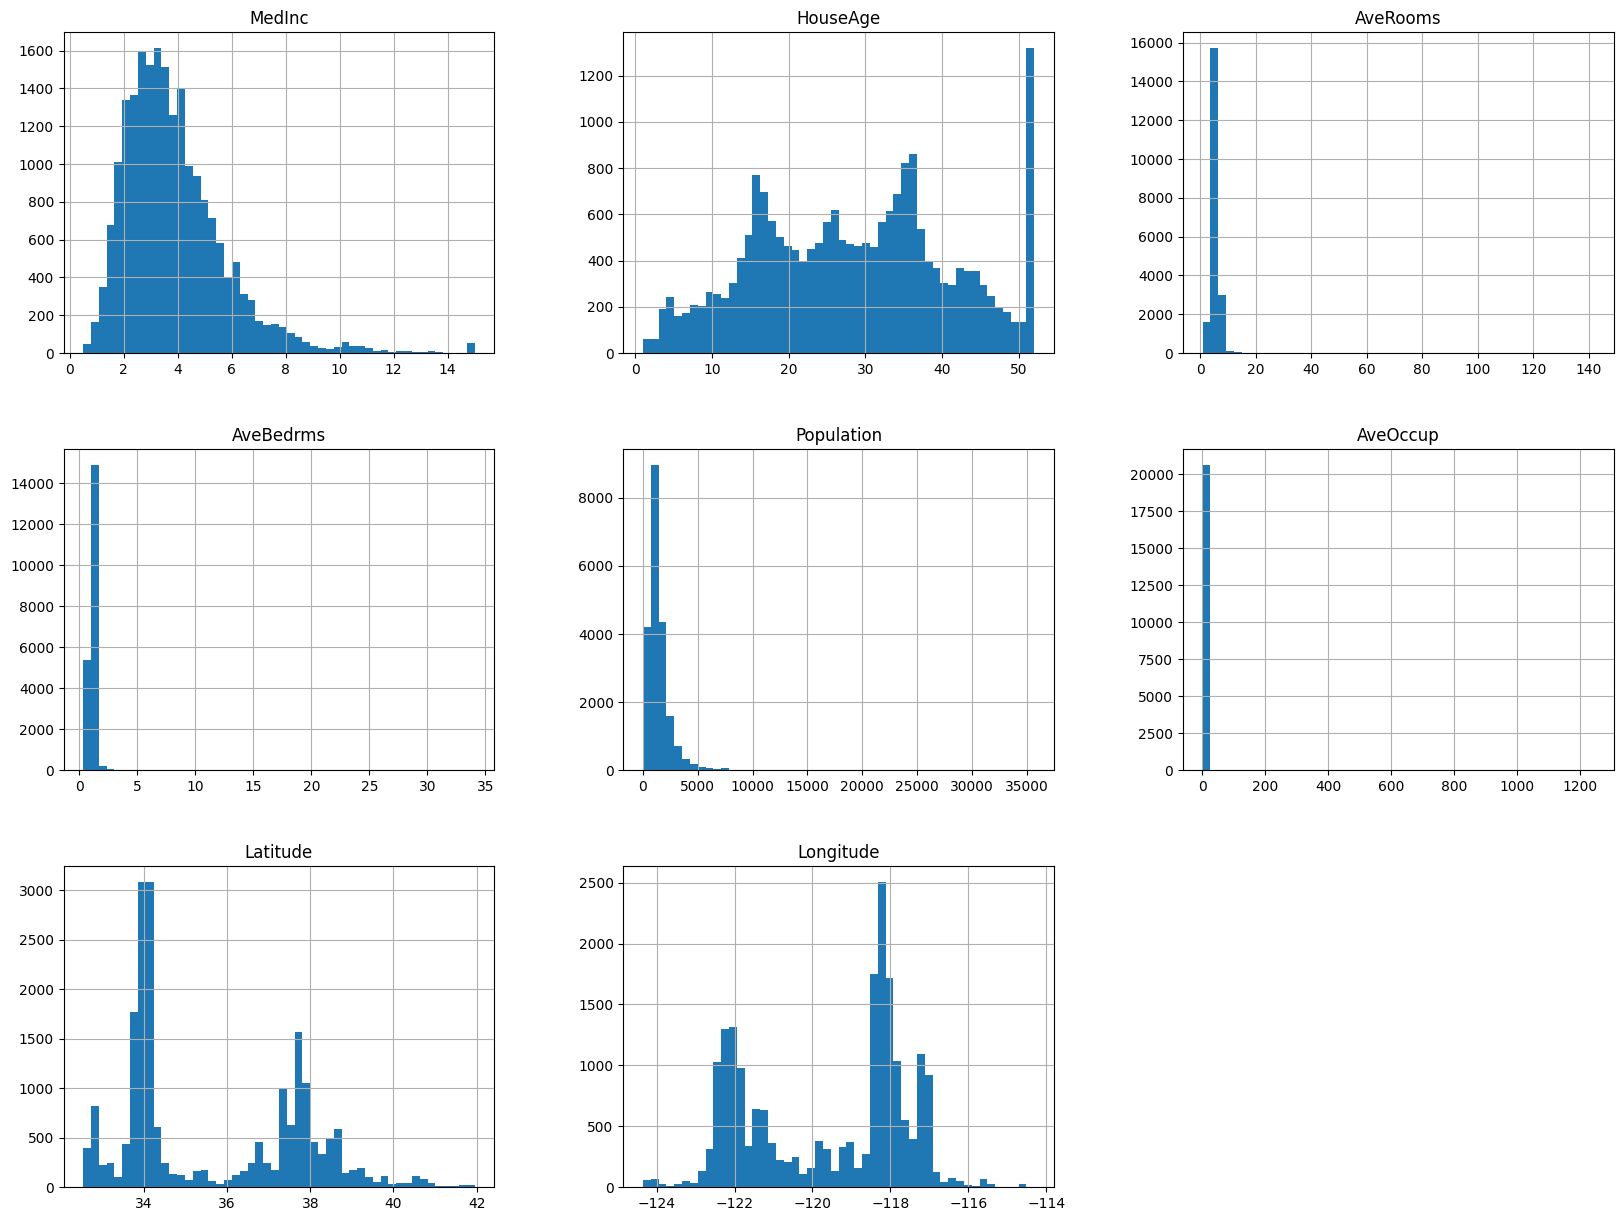

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins = 50, figsize=(20, 15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14448, 8)
(14448, 1)
(6192, 8)
(6192, 1)


<Axes: xlabel='Longitude', ylabel='Latitude'>

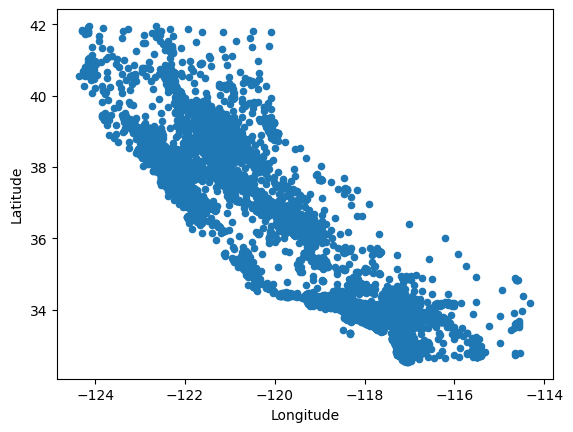

In [10]:
X.plot(kind='scatter', x='Longitude', y='Latitude')

<Axes: xlabel='Longitude', ylabel='Latitude'>

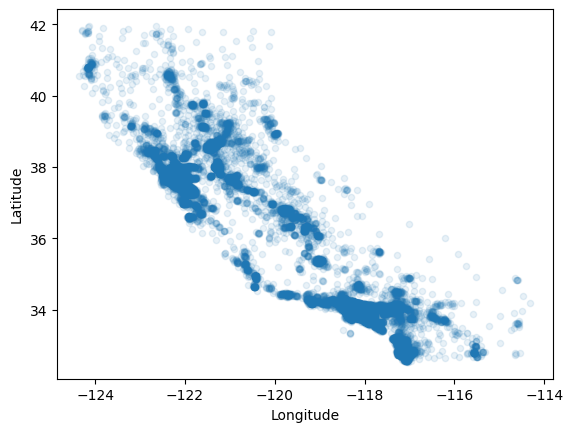

In [11]:
X.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.1)

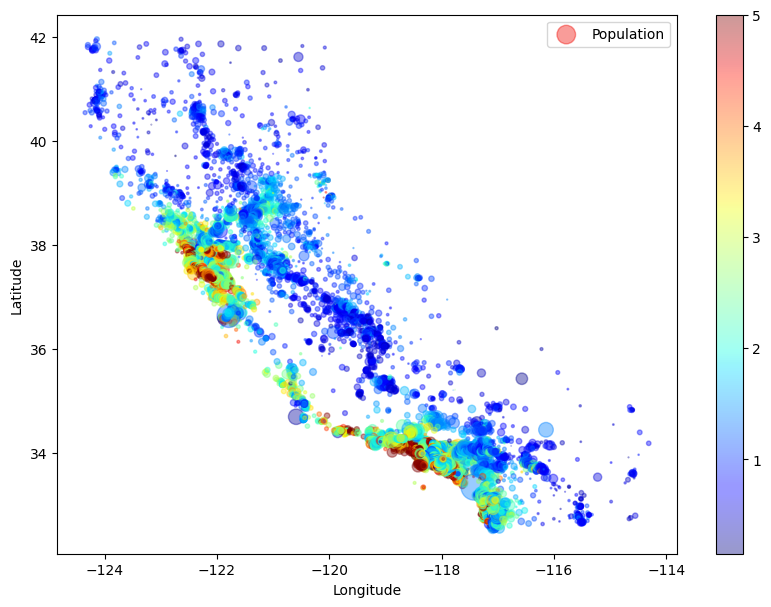

In [12]:
X.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, s=X['Population']/100, label='Population',c=y['MedHouseVal'], figsize=(10, 7), cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()


# Model Training

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lin_reg.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.5305677824766758
Root Mean Squared Error (RMSE): 0.7284008391515456
Mean Absolute Error (MAE): 0.5272474538305952
R-squared (R²): 0.595770232606166


In [20]:
y_pred[2]

array([2.71092161])

In [38]:
y_test.iloc[2, 0]

5.00001

In [29]:
y_test.shape

(6192, 1)

**Let's train a DecisionTreeRegressor**

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
y_pred_tree = tree_reg.predict(X_test)

In [44]:
# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree}")
print(f"Mean Absolute Error (MAE): {mae_tree}")
print(f"R-squared (R²): {r2_tree}")

Mean Squared Error (MSE): 0.5342583634926356
Root Mean Squared Error (RMSE): 0.7309297938192392
Mean Absolute Error (MAE): 0.47389238372093034
R-squared (R²): 0.5929584472793871


In [45]:
y_pred_tree[2]

5.000010000000001

In [46]:
y_test.iloc[2, 0]

5.00001

In [47]:
y_pred_tree

array([0.425  , 0.73   , 5.00001, ..., 2.13   , 1.293  , 2.583  ])

In [48]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
17505,2.37500
13512,0.67300
10842,2.18400
16559,1.19400


**Better Evaluation**

In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)
scores.mean()

-0.5268253746355749

In [56]:
scores_tree = cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores_tree)
scores_tree.mean()

-0.5526490299593216

**Ensemble Learning**

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

<ipython-input-57-4d551cb70db1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


In [58]:
scores_forest = cross_val_score(forest_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores_forest)
scores_forest.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

-0.2693528337609808

#Fine Tuning your Model

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [{
    'n_estimators' : [3, 10 ,30],
    'max_features' : [2,4,6,8],
},{
    'bootstrap' : [False],
    'n_estimators' : [3, 10],
    'max_features' : [2, 3, 4]
}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [61]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [63]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [64]:
grid_search.best_score_

-0.26536793717688373

In [65]:
grid_search.cv_results_

{'mean_fit_time': array([0.17543964, 0.56206884, 1.39467001, 0.15010977, 0.48588934,
        1.6299212 , 0.22404113, 0.68948102, 2.26836329, 0.27042236,
        0.8716538 , 3.09453316, 0.18970575, 0.44726357, 0.17700558,
        0.56756043, 0.22102818, 0.83452668]),
 'std_fit_time': array([0.01226092, 0.04165925, 0.26604981, 0.00302755, 0.00532223,
        0.26138058, 0.03396413, 0.01017364, 0.27656471, 0.00810243,
        0.00360224, 0.29404376, 0.00421819, 0.07447713, 0.01235638,
        0.00439438, 0.00236605, 0.14873069]),
 'mean_score_time': array([0.0113409 , 0.03577113, 0.05261292, 0.00663304, 0.01326857,
        0.03846021, 0.00847797, 0.01554923, 0.03583183, 0.00764503,
        0.01483331, 0.04031553, 0.01208282, 0.01710811, 0.00687385,
        0.01701674, 0.00756164, 0.02055116]),
 'std_score_time': array([0.00097176, 0.0185216 , 0.01568391, 0.00048803, 0.00030368,
        0.00760103, 0.00114714, 0.0020163 , 0.00278034, 0.00063612,
        0.00123396, 0.00562732, 0.00117509, 